# Modelling

##### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import sys

from utils import pickle_to, pickle_from, plot_cmat, get_accuracy

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_colwidth = -1


##### Ignore warning messages

In [2]:
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") # Change the filter in this process
    os.environ["PYTHONWARNINGS"] = "default" # Also affect subprocesses

#### Unpickling necessary objects

In [3]:
X_train = pickle_from('../data/processed/X_train.pkl')
y_train = pickle_from("../data/processed/y_train.pkl")
X_val = pickle_from('../data/processed/X_val.pkl')
y_val = pickle_from('../data/processed/y_val.pkl')

Loaded file from ../data/processed/X_train.pkl
Loaded file from ../data/processed/y_train.pkl
Loaded file from ../data/processed/X_val.pkl
Loaded file from ../data/processed/y_val.pkl


#### Dictionary to save model performance

In [4]:
tr_performance = {}
val_performance = {}



# Binary Count Vectorizer

In [5]:
c_bin = CountVectorizer(tokenizer=lambda doc: doc,lowercase=False, binary = 'boolean')
c_bin_vectorizer = c_bin.fit(X_train)

In [6]:
X_train_bin = c_bin_vectorizer.transform(X_train)
X_train_bin = X_train_bin.toarray()
X_val_bin = c_bin_vectorizer.transform(X_val)
X_val_bin = X_val_bin.toarray()



### Pickling binary count vectorizer

In [8]:
pickle_to(X_train_bin,'../models/X_train_bin.pkl')
pickle_to(X_val_bin,'../models/X_val_bin.pkl')


Sucessfully saved to ../models/X_train_bin.pkl
Sucessfully saved to ../models/X_val_bin.pkl


### Unpickling

In [9]:
X_train_bin = pickle_from('../models/X_train_bin.pkl')
X_val_bin = pickle_from('../models/X_val_bin.pkl')



Loaded file from ../models/X_train_bin.pkl
Loaded file from ../models/X_val_bin.pkl


## Naive Bayes

In [9]:
nb = GaussianNB()



In [10]:
nb.fit(X_train_bin,y_train)




GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
tr_accuracy = np.mean(cross_val_score(nb, X_train_bin, y_train,cv=10))
val_accuracy = np.mean(cross_val_score(nb, X_val_bin, y_val,cv=10))
print('Accuracy on train:', tr_accuracy,'\n', 'Accuracy on val:', val_accuracy)




Accuracy on train: 0.8119180762044034 
 Accuracy on val: 0.7985677419354839


In [12]:
# Saving model performance to dictionary
tr_performance['nb'] = tr_accuracy
val_performance['nb'] = val_accuracy


## Random Forest

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train_bin,y_train)




/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
tr_accuracy = np.mean(cross_val_score(rf, X_train_bin, y_train,cv=10))
val_accuracy = np.mean(cross_val_score(rf, X_val_bin, y_val,cv=10))
print('Accuracy on train:', tr_accuracy,'\n', 'Accuracy on val:', val_accuracy)





Accuracy on train: 0.8100513751296278 
 Accuracy on val: 0.7672258064516129


In [15]:
# Saving model performance to dictionary
tr_performance['rf'] = tr_accuracy
val_performance['rf'] = val_accuracy

## Gradient Boosting

In [16]:
gb = GradientBoostingClassifier()

In [17]:
gb.fit(X_train_bin,y_train)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [18]:
tr_accuracy = np.mean(cross_val_score(gb, X_train_bin, y_train,cv=10))
val_accuracy = np.mean(cross_val_score(gb, X_val_bin, y_val,cv=10))
print('Accuracy on train:', tr_accuracy,'\n', 'Accuracy on val:', val_accuracy)






Accuracy on train: 0.8793438698608862 
 Accuracy on val: 0.8667935483870968


In [19]:
# Saving model performance to dictionary
tr_performance['gb'] = tr_accuracy
val_performance['gb'] = val_accuracy


## SVM Classifier

In [20]:
svm = SVC()
svm.fit(X_train_bin,y_train)



/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
tr_accuracy = np.mean(cross_val_score(svm, X_train_bin, y_train,cv=10))


/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaco

In [22]:
val_accuracy = np.mean(cross_val_score(svm, X_val_bin, y_val,cv=10))
print('Accuracy on train:', tr_accuracy,'\n', 'Accuracy on val:', val_accuracy)






/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaco

Accuracy on train: 0.5794765532632746 
 Accuracy on val: 0.510425806451613


In [23]:
# Saving model performance to dictionary
tr_performance['svm'] = tr_accuracy
val_performance['svm'] = val_accuracy


## Logistic Regression

In [24]:
logreg= LogisticRegressionCV(scoring='accuracy',max_iter = 1000)
logreg.fit(X_train_bin,y_train)




/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring='accuracy',
           solver='lbfgs', tol=0.0001, verbose=0)

In [25]:
tr_accuracy = np.mean(cross_val_score(logreg, X_train_bin, y_train,cv=10))
val_accuracy = np.mean(cross_val_score(logreg, X_val_bin, y_val,cv=10))
print('Accuracy on train:', tr_accuracy,'\n', 'Accuracy on val:', val_accuracy)







/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: Change

/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: Change

Accuracy on train: 0.9071729647842564 
 Accuracy on val: 0.9068838709677418


/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


In [26]:
# Saving model performance to dictionary
tr_performance['logreg'] = tr_accuracy
val_performance['logreg'] = val_accuracy

# Comparing model performance

In [28]:
val_performance


{'nb': 0.7985677419354839,
 'rf': 0.7672258064516129,
 'gb': 0.8667935483870968,
 'svm': 0.510425806451613,
 'logreg': 0.9068838709677418}

In [29]:
performance = pd.DataFrame({'train_performance':pd.Series(tr_performance),'val_performance':pd.Series(val_performance)})
performance['diff'] = performance.train_performance - performance.val_performance
performance = performance.sort_values(by = ['val_performance'],ascending = False)

In [30]:
# Add column with expanded model names
performance['model'] = ['Logistic Regression', 'Gradient Boosting', 'Naive Bayes', 'Random Forest', 'Support Vector Classifier']
performance

,train_performance,val_performance,diff,model
logreg,0.907173,0.906884,0.000289,Logistic Regression
gb,0.879344,0.866794,0.012550,Gradient Boosting
nb,0.811918,0.798568,0.013350,Naive Bayes
rf,0.810051,0.767226,0.042826,Random Forest
svm,0.579477,0.510426,0.069051,Support Vector Classifier


## Saving model performances

In [31]:
pickle_to(performance,'performance.pkl')
pickle_to(val_performance,'val_performance.pkl')
pickle_to(tr_performance,'tr_performance.pkl')

Sucessfully saved to performance.pkl
Sucessfully saved to val_performance.pkl
Sucessfully saved to tr_performance.pkl


# Comparing model performances

In [32]:
performance

,train_performance,val_performance,diff,model
logreg,0.907173,0.906884,0.000289,Logistic Regression
gb,0.879344,0.866794,0.012550,Gradient Boosting
nb,0.811918,0.798568,0.013350,Naive Bayes
rf,0.810051,0.767226,0.042826,Random Forest
svm,0.579477,0.510426,0.069051,Support Vector Classifier


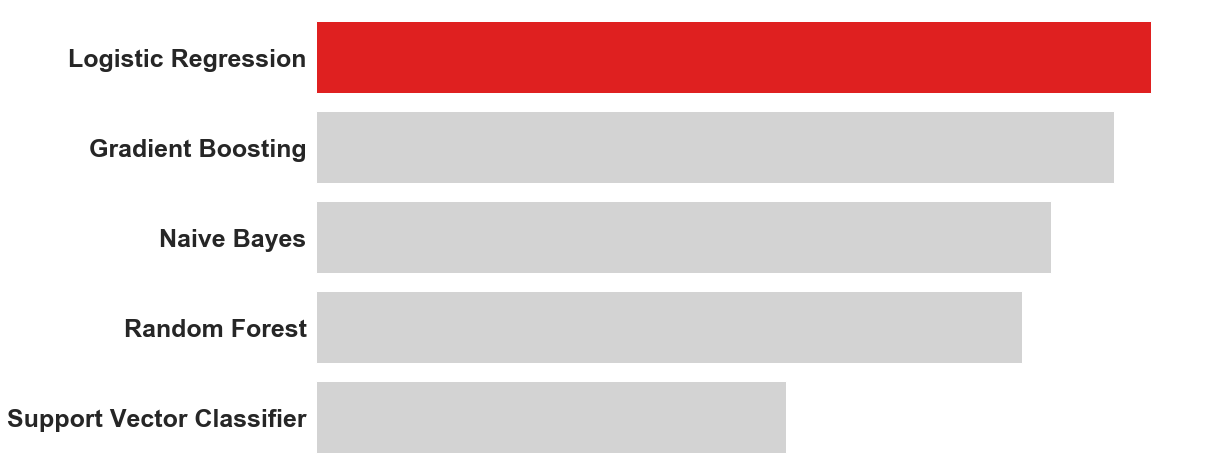

In [33]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.set_style(style = 'white')
values = np.array(performance['val_performance'])
labels = np.array(performance['model'])
clrs = ['red' if (x == 'Logistic Regression') else 'lightgray' for x in labels]
ax = sns.barplot(y=performance['model'],x=performance['val_performance'],palette = clrs)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)
ax.set_ylabel('')    
ax.set_xlabel('')
xlabels = [10,30,50,70,90]
# ax.set_xticklabels(labels = xlabels , size = 25,weight = 'bold')
ax.set_yticklabels(labels = labels,size =25,weight = 'bold')
ax.set_xticklabels('')

figure = ax.get_figure() 
figure.savefig('../reports/figures/text.png',dpi = 500, bbox_inches = 'tight',transparent = True)


plt.show();







# Chosen Model - Logistic regression



## Unpickle whole training set and test set

In [34]:
X_tr_val = pickle_from('../data/processed/X_tr_val.pkl')
y_tr_val = pickle_from('../data/processed/y_tr_val.pkl')
X_test = pickle_from('../data/processed/X_test.pkl')
y_test = pickle_from('../data/processed/y_test.pkl')

Loaded file from ../data/processed/X_tr_val.pkl
Loaded file from ../data/processed/y_tr_val.pkl
Loaded file from ../data/processed/X_test.pkl
Loaded file from ../data/processed/y_test.pkl


## Fit chosen model on entire dataset

In [35]:
logreg= LogisticRegressionCV(scoring='accuracy',max_iter = 1000)
logreg.fit(X_train_bin,y_train)




/Applications/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring='accuracy',
           solver='lbfgs', tol=0.0001, verbose=0)

In [36]:
y_pred = logreg.predict(X_val_bin)
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cm_normalized = cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:,np.newaxis]





ON VALIDATION SET


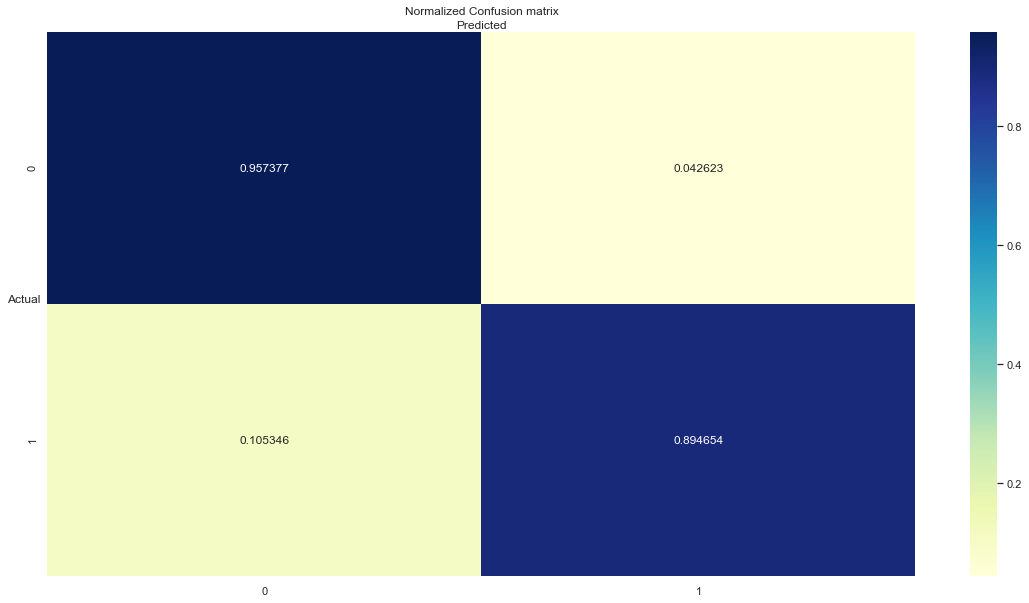

In [37]:
# name  of classes
class_names=['Fake','Real'] 

# Set fig and axes 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cm_normalized), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Normalized Confusion matrix', y=1.1)
plt.ylabel('Actual',rotation=0)
plt.xlabel('Predicted');

print("ON VALIDATION SET")

